In [15]:
import h5py
from numpy import *
import numpy as np
import pandas as pd
import QuarkTM

In [8]:
import matplotlib

In [9]:
F0 = h5py.File('m0_0_thr/data.hdf5')
F1 = h5py.File('more_prec/m0_adaptive/data.hdf5')

In [10]:
keys = ['P_Phi', 'P_Phi_G', 'P_Phi_Q', 'P_Q_G', 'P_Q_Q', 'P_S_G', 'P_S_Q', 'Ptot']

d_p = {k : [float(d.attrs[k]) for _, d in F0.items()] for k in keys}

df_p = pd.DataFrame(d_p)

/tmp/ipykernel_275168/1596035810.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d_p = {k : [float(d.attrs[k]) for _, d in F0.items()] for k in keys}


In [19]:
keys = ['P_Phi', 'P_Phi_G', 'P_Phi_Q', 'P_Q_G', 'P_Q_Q', 'P_S_G', 'P_S_Q', 'Ptot']

d_p1 = {k : [float(d.attrs[k]) for _, d in F1.it ems()] for k in keys}

df_p1 = pd.DataFrame(d_p1)

/tmp/ipykernel_275168/453228184.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d_p1 = {k : [float(d.attrs[k]) for _, d in F1.items()] for k in keys}


In [16]:
import os
lat = pd.read_csv(os.path.join(os.path.dirname(QuarkTM.__file__), "PT.csv"))

Text(0, 0.5, 'P/T$^4$')

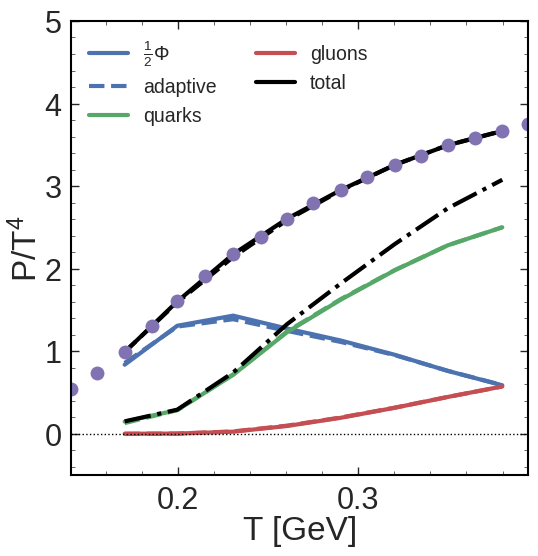

In [28]:
matplotlib.style.use('publication')
Trange = F0.attrs['Trange']

P_QP_Q = df_p.P_Q_Q + df_p.P_S_Q
P_QP_G = df_p.P_Q_G + df_p.P_S_G

P_QP_Q1 = df_p1.P_Q_Q + df_p1.P_S_Q
P_QP_G1 = df_p1.P_Q_G + df_p1.P_S_G

lp, = plt.plot(Trange, df_p.P_Phi/Trange**4, label=r'$\frac{1}{2}\Phi$')
plt.plot(Trange, df_p1.P_Phi/Trange**4, c=lp.get_c(), ls='--', label='adaptive')

lQ, = plt.plot(Trange, P_QP_Q/Trange**4, label='quarks')
plt.plot(Trange, P_QP_Q1/Trange**4, c=lQ.get_c(), ls='--')

# plt.plot(Trange, 3*3*2*2*ps_free_Q/Trange**4, ls=':', c=lQ.get_c())
lG, = plt.plot(Trange, P_QP_G/Trange**4, label='gluons')
lG, = plt.plot(Trange, P_QP_G1/Trange**4, ls='--', c=lG.get_c())
# plt.plot(Trange, 8*2*ps_free_G/Trange**4, ls=':', c=lG.get_c(), label='free')
plt.plot(Trange, (P_QP_Q + P_QP_G)/Trange**4, ls='-.', c='black')
ltot, = plt.plot(Trange, df_p.Ptot/Trange**4, c='black', label='total')

plt.plot(Trange, df_p1.Ptot/Trange**4, ls='--', c=ltot.get_c())
plt.ylim(-0.5, 5)
plt.legend(ncol=2, fontsize=14)

# lat = pd.read_csv(os.path.join(os.path.dirname(Quark), "PT.csv"))
plt.plot(lat.x, lat.PT_lat, ls='none', marker='o')
plt.axhline(0, lw=1, ls=':', c='black')
plt.xlabel('T [GeV]')

# try:
#     plt.title(df.attrs['comment'])
# except:
#     pass
plt.ylabel(r'P/T$^4$')
# plt.savefig('PT.pdf', bbox_inches='tight')